###  print out structures

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mycrograd.engine import Value
from mycrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

In [21]:
nin=3
myNeuron=Neuron(nin)
print("number of inputs: ",nin)
print("Neuron(2): ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("number of parameters ", len(myNeuron.parameters()))
# xi=[1,2,3,4]
xi= np.random.randint(1,10, size=(nin))
print("inputs ", xi)
print("activation: ",myNeuron(xi))



number of inputs:  3
Neuron(2):  ReLUNeuron(3)
weights:  [Value(data=0.5808552090645627, grad=0), Value(data=0.09921848842252134, grad=0), Value(data=0.5519936528601597, grad=0)]
b:  Value(data=0, grad=0)
number of parameters  4
inputs  [8 5 2]
activation:  Value(data=6.246921420349428, grad=0)


In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=10, noise=0.1)

print(X)
print(y)

y = y*2 - 1 # make y be -1 or 1


[[ 0.23716815 -0.17338508]
 [-0.55222318  0.57003313]
 [ 1.14252914 -0.02794639]
 [-1.05596279  0.11863834]
 [ 0.16985189  0.33087798]
 [-0.06995228  1.05829628]
 [ 0.80492904  0.58536957]
 [ 1.86706046  0.49985453]
 [ 1.57564151 -0.24506796]
 [ 1.12652106 -0.48793323]]
[1 0 0 0 1 0 0 1 1 1]


In [5]:
# initialize a model 
model = MLP(3, [4, 4, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
number of parameters 41


In [6]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    print(model)
    print(inputs)
    print(list(map(model, inputs)))
    print(scores)

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
[[Value(data=0.23716814800105823, grad=0), Value(data=-0.1733850803423769, grad=0)], [Value(data=-0.5522231840196069, grad=0), Value(data=0.5700331253604513, grad=0)], [Value(data=1.1425291398662902, grad=0), Value(data=-0.027946390980293462, grad=0)], [Value(data=-1.0559627906760132, grad=0), Value(data=0.11863833674456072, grad=0)], [Value(data=0.16985189051376626, grad=0), Value(data=0.3308779842359495, grad=0)], [Value(data=-0.069952284423216, grad=0), Value(data=1.0582962841937447, grad=0)], [Value(data=0.8049290441685284, grad=0), Value(data=0.5853695706393609, grad=0)], [Value(data=1.8670604551568166, grad=0), Value(data=0.49985452577335704, grad=0)], [Value(data=1.575641512808095, grad=0), Value(data=-0.24506795552830413, grad=0)], [Value(data=1.1265210647376644, grad=0), Value(data=-0.4879332255931098,

In [7]:
# optimization
for k in range(10):
    
    # forward
    total_loss, acc = loss()
    
    #draw_dot(total_loss)

    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
[[Value(data=0.23716814800105823, grad=0), Value(data=-0.1733850803423769, grad=0)], [Value(data=-0.5522231840196069, grad=0), Value(data=0.5700331253604513, grad=0)], [Value(data=1.1425291398662902, grad=0), Value(data=-0.027946390980293462, grad=0)], [Value(data=-1.0559627906760132, grad=0), Value(data=0.11863833674456072, grad=0)], [Value(data=0.16985189051376626, grad=0), Value(data=0.3308779842359495, grad=0)], [Value(data=-0.069952284423216, grad=0), Value(data=1.0582962841937447, grad=0)], [Value(data=0.8049290441685284, grad=0), Value(data=0.5853695706393609, grad=0)], [Value(data=1.8670604551568166, grad=0), Value(data=0.49985452577335704, grad=0)], [Value(data=1.575641512808095, grad=0), Value(data=-0.24506795552830413, grad=0)], [Value(data=1.1265210647376644, grad=0), Value(data=-0.4879332255931098,

(-1.48793322559311, 2.01206677440689)

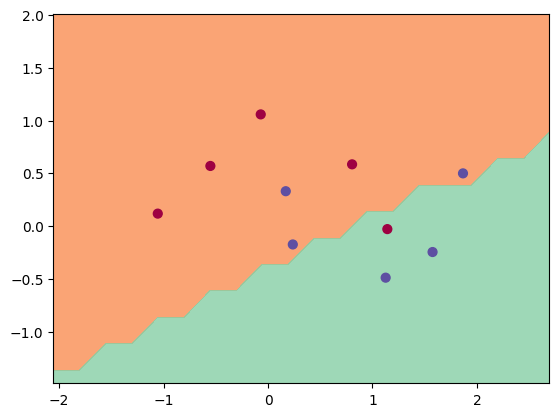

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())